In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
# Importing train set
train_data = pd.read_csv("train.csv")

## Exploring the Data

In [3]:
# Printing first 5 columns of train set
train_data.head(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [4]:
# Missing data
train_data.count()

TripType                 647054
VisitNumber              647054
Weekday                  647054
Upc                      642925
ScanCount                647054
DepartmentDescription    645693
FinelineNumber           642925
dtype: int64

<b> Maximum 647,054 rows of data. </b>
<p>It can seen that there are only three attributes/columns with missing data :</b> <br>
<p> 1. Upc (~4,000 rows of missing data)<br>
<p> 2. Fineline Number (same number of missing values as Upc feature)<br>
<p> 3. Department Description (~1,500 missing values)<br>
<br>

<b><i>Initial thought by viewing the data: 4,000 rows of data represents a very small portion of the test data (0.6%), thus it will be safe to remove missing rows data from the train set.</i></b>

<b> Exploration 1 : What does column Trip Type represent?

In [5]:
# Total number of unique trip types
len(train_data.TripType.unique())

38

In [6]:
# All the unique trip numbers
train_data.TripType.unique()

array([999,  30,  26,   8,  35,  41,  21,   6,  42,   7,   9,  39,  25,
        38,  15,  36,  20,  37,  32,  40,   5,   3,   4,  24,  33,  43,
        31,  27,  34,  18,  29,  44,  19,  23,  22,  28,  14,  12])

<b> Observation 1:  As all the trips are in two digit numbers, except '999', thus it needs to be explored more in order to find what '999' represents. Exploration done at the end.

<b> Exploration 2 : What does column visit number represent?

In [7]:
# Total number of unique Visitnumbers 
len(train_data.VisitNumber.unique())

95674

In [8]:
# Maximum Visitnumber
train_data.VisitNumber.max()

191347

In [9]:
# Minimum Visitnumber
train_data.VisitNumber.min()

5

<b> Observation 2 : The dataset contains in all 95674 unique store trips, as each visit number is the ID for a trip, and will be repeated for every item that is purchased on that trip.

<b> Exploration 3: What does column Weekday represent ?

In [10]:
#unique weekdays 
train_data.Weekday.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [11]:
# General code for font style
font_main ={'fontsize': 15,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}
font_sub={'fontsize': 12,
          'weight' : 'bold',
           'horizontalalignment': 'center'}

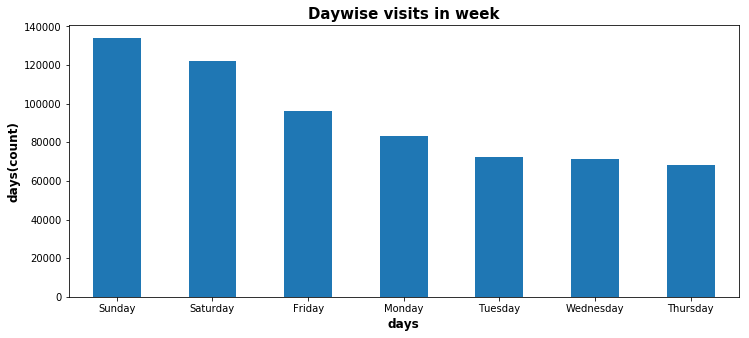

In [12]:
#ploting histogram for daywise visits
#data_tripwd = train_data.drop_duplicates("VisitNumber")
plt.figure(figsize=(12,5))
plt.xlabel('days',fontdict=font_sub)
plt.ylabel('days(count)',fontdict=font_sub)
plt.title('Daywise visits in week',fontdict=font_main)
train_data['Weekday'].value_counts().plot('bar',rot=0)

<b> Observation 3: Nothing seems weird for days of the week, but should be changed to numerals. Step done in data cleaning.

<b> Exploration 4: What does column Upc represent ?

In [13]:
# Unique Upc numbers
train_data.Upc.unique()

array([6.81131529e+10, 6.05388160e+10, 7.41081110e+09, ...,
       8.85306278e+10, 8.87439527e+10, 5.44000008e+09])

In [14]:
# Minimum Upc number
train_data.Upc.min()

834.0

In [15]:
#Maximum Upc number
train_data.Upc.max()

978970666419.0

<b> Observation 4 : Data for Upc looks clean, as no, negative Upc numbers found.

<b> Exploration 5 : What does column Scancount represent ?

In [16]:
#Unique Scancount numbers
train_data.ScanCount.unique()

array([ -1,   1,   2,   3,   5,   6,   4,  14,  -2,   9,   7,  10,   8,
        -3,  -5,  11,  16,  -4,  13,  15,  30,  -6,  12,  20, -12,  19,
        46,  23,  -7,  22,  25,  24,  31,  -9,  51,  17,  18,  71, -10])

<b> Observation 5 : Data for Scancount looks clean, assuming negative values represent return trips <br>

<b> Exploration 6 : What does column DepartmentDescription represent ?

In [17]:
## Total number of unique DepartmentDescription
len(train_data.DepartmentDescription.unique())

69

In [18]:
# Unique DepartmentDescription.
train_data.DepartmentDescription.unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP', nan,
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',

<b> Observation 6 : Data for DepartmentDescription column look clean. Thus, no cleaning required.

<b> Exploration 7 : What does column FinelineNumber represent ?

In [19]:
# Total number of unique FinelineNumber.
len(train_data.FinelineNumber.unique())

5196

In [20]:
# Maximum FinelineNumber
train_data.FinelineNumber.max()

9998.0

In [21]:
# Minimum FinelineNumber
train_data.FinelineNumber.min()

0.0

In [22]:
train_data[train_data.FinelineNumber == 0].count()

TripType                 3837
VisitNumber              3837
Weekday                  3837
Upc                      3837
ScanCount                3837
DepartmentDescription    3837
FinelineNumber           3837
dtype: int64

<b> Observation 7: Fineline number of 0.0 seems weired , and it occurs over 3000 times. Needs to be explored more.

In [23]:
fineline_is_zero = train_data[train_data.FinelineNumber == 0]

<b><u> More exploration of FinelineNumber column</u>.
<p>(Almost all the fineline with 0(fineline = 0) is either when an item is purchased or when an item is returned)

In [24]:
fineline_is_zero[fineline_is_zero.ScanCount == 1].count()  

TripType                 3743
VisitNumber              3743
Weekday                  3743
Upc                      3743
ScanCount                3743
DepartmentDescription    3743
FinelineNumber           3743
dtype: int64

In [25]:
fineline_is_zero[fineline_is_zero.ScanCount == -1].count()  

TripType                 53
VisitNumber              53
Weekday                  53
Upc                      53
ScanCount                53
DepartmentDescription    53
FinelineNumber           53
dtype: int64

## Cleaning Data

In [26]:
# Dropping all the missing values
cleaned_train_data = train_data.dropna()

In [27]:
#Count after dropping missing values
cleaned_train_data.count()

TripType                 642925
VisitNumber              642925
Weekday                  642925
Upc                      642925
ScanCount                642925
DepartmentDescription    642925
FinelineNumber           642925
dtype: int64

In [28]:
cleaned_train_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


## Data Analysis

<b> Some essential points to be considered while thinking about the types of trips:<br>
1. Days of week(weekday trips vs. weekend trips).<br>
2. Types of items purchased.<br>

In [29]:
# General code for font style
font_main ={'fontsize': 15,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}
font_sub={'fontsize': 12,
          'weight' : 'bold',
           'horizontalalignment': 'center'}

### Q1. How can retailers determine which factors lead to an increase/decrease in sales of products? 

This is done by analysing the data, which displays that <b><i>weekdays</i></b> and <b><i>trips</i></b> were the most important factor.

<b> 1. Days of week(weekday trips vs. weekend trips)

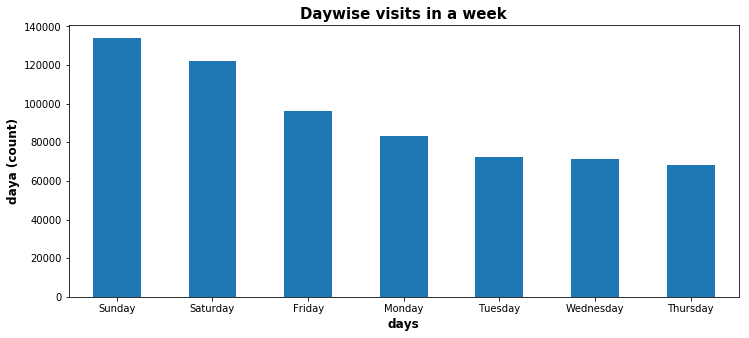

In [30]:
#ploting histogram for daywise visits - again after data exploration
#data_tripwd = train_data.drop_duplicates("VisitNumber")
plt.figure(figsize=(12,5))
plt.xlabel('days',fontdict=font_sub)
plt.ylabel('daya (count)',fontdict=font_sub)
plt.title('Daywise visits in a week',fontdict=font_main)
train_data['Weekday'].value_counts().plot('bar',rot=0)

In [31]:
# Converting Categorical data to numerical data
cleaned_train_data = cleaned_train_data.replace("Monday", 1)
cleaned_train_data = cleaned_train_data.replace("Tuesday", 2)
cleaned_train_data = cleaned_train_data.replace("Wednesday", 3)
cleaned_train_data = cleaned_train_data.replace("Thursday", 4)
cleaned_train_data = cleaned_train_data.replace("Friday", 5)
cleaned_train_data = cleaned_train_data.replace("Saturday", 6)
cleaned_train_data = cleaned_train_data.replace("Sunday", 7)

<b> Observation for days of the week : Most of the trips are done during weekends mainly on saturday and sunday.

<b> 2. Exploring the data for trip type column

In [32]:
# Total 38 unique trips
x = cleaned_train_data.TripType.unique()
np.sort(x)

array([  3,   4,   5,   6,   7,   8,   9,  12,  14,  15,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44, 999])

In [33]:
data_triptypes = cleaned_train_data.drop_duplicates("VisitNumber")

In [34]:
# General code for font style
font_main ={'fontsize': 15,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}
font_sub={'fontsize': 12,
          'weight' : 'bold',
           'horizontalalignment': 'center'}

Text(0.5, 1.0, 'Number of Occurences of all 38 trip types')

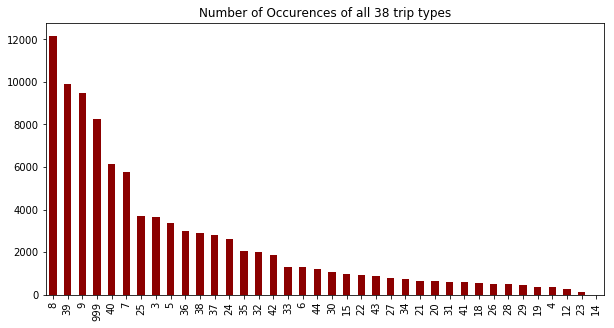

In [35]:
# Total number of trips
x = data_triptypes["TripType"]
x = x.value_counts()
viz1 = x.plot(kind="bar", figsize=(10, 5), color="darkred")
viz1.set_title("Number of Occurences of all 38 trip types")

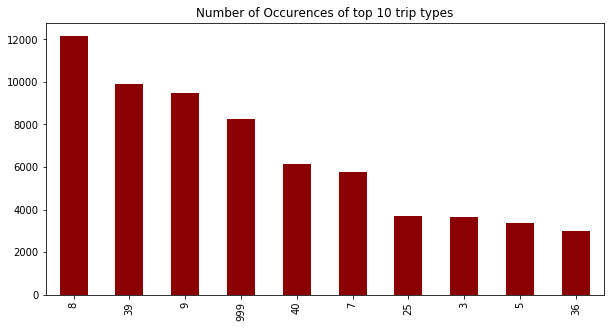

In [36]:
# Top 10 trips.
x = data_triptypes["TripType"]
x = x.value_counts().head(10)
viz1 = x.plot(kind="bar", figsize=(10, 5), color="darkred" , title ='Number of Occurences of top 10 trip types')

<b> Trip 8 - All in one trips (Top most frequent trip with main focus on grocery products and on personal care products).

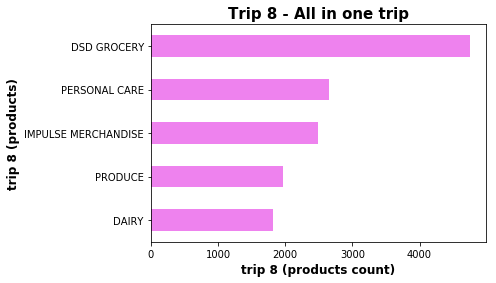

In [37]:
plt.xlabel('trip 8 (products count)',fontdict=font_sub)
plt.ylabel('trip 8 (products)',fontdict=font_sub)
plt.title('Trip 8 - All in one trip',fontdict=font_main)
type_8 = cleaned_train_data[cleaned_train_data.TripType == 8]
type_8_items = type_8[["TripType","DepartmentDescription"]]
type_8_items.DepartmentDescription.value_counts().head().plot(kind="barh", rot=0,color="violet",).invert_yaxis()

<b> Trip 39 : Grocery Trip(Focus majorily on grocery items)

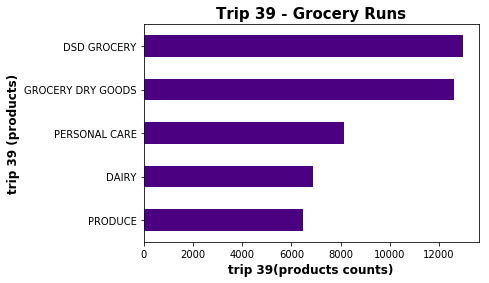

In [38]:
plt.xlabel('trip 39(products counts)',fontdict=font_sub)
plt.ylabel('trip 39 (products)',fontdict=font_sub)
plt.title('Trip 39 - Grocery Runs',fontdict=font_main)
type_39 = cleaned_train_data[cleaned_train_data.TripType == 39]
type_39_items = type_39[["TripType","DepartmentDescription"]]
type_39_items.DepartmentDescription.value_counts().head().plot(kind="barh", rot=0,color="indigo").invert_yaxis() 

<b> Trip 9 - Men's clothing(Focus majorily on clothig of Mens). 

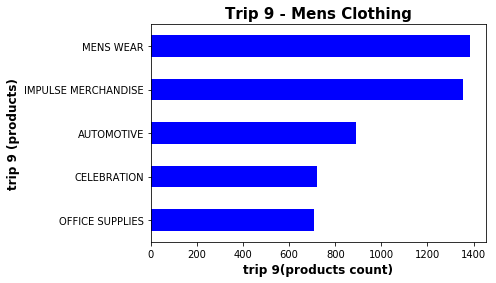

In [39]:
plt.xlabel('trip 9(products count)',fontdict=font_sub)
plt.ylabel('trip 9 (products)',fontdict=font_sub)
plt.title('Trip 9 - Mens Clothing',fontdict=font_main)
type_9 = cleaned_train_data[cleaned_train_data.TripType == 9]
type_9_items = type_9[["TripType","DepartmentDescription"]]
x = type_9_items.DepartmentDescription.value_counts().head().plot(kind="barh", rot=0,color="blue").invert_yaxis()

<b> Trip 999 : Mixture of typical stuff.

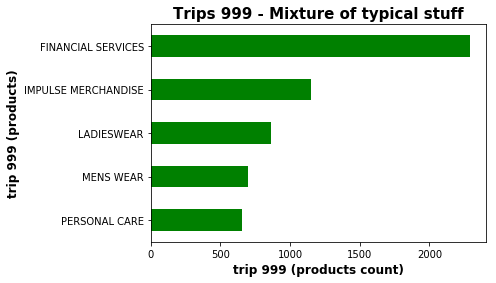

In [40]:
plt.xlabel('trip 999 (products count)',fontdict=font_sub)
plt.ylabel('trip 999 (products)',fontdict=font_sub)
plt.title('Trips 999 - Mixture of typical stuff',fontdict=font_main)
type_999 = cleaned_train_data[cleaned_train_data.TripType == 999]
type_999_items = type_999[["TripType","DepartmentDescription"]]
type_999_items.DepartmentDescription.value_counts().head().plot(kind="barh", rot=0,color="green").invert_yaxis() 

<b> Trip 40 : Another grocery trip 

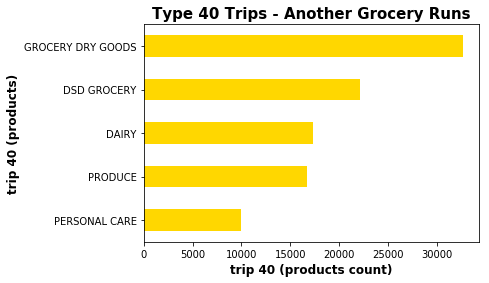

In [41]:
plt.xlabel('trip 40 (products count)',fontdict=font_sub)
plt.ylabel('trip 40 (products)',fontdict=font_sub)
plt.title('Type 40 Trips - Another Grocery Runs',fontdict=font_main)
type_40 = cleaned_train_data[cleaned_train_data.TripType == 40]
type_40_items = type_40[["TripType","DepartmentDescription"]]
x = type_40_items.DepartmentDescription.value_counts().head().plot(kind="barh", rot=0, color="gold").invert_yaxis() 

<b> Trip 7 - Service trips(focus on Product Srvices and Grocery items).

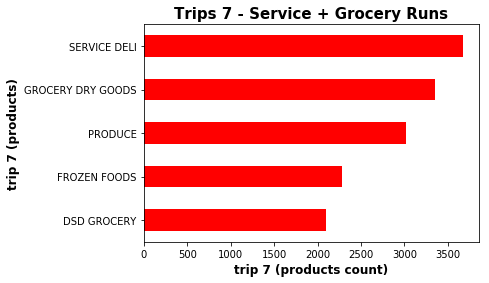

In [42]:
plt.xlabel('trip 7 (products count)',fontdict=font_sub)
plt.ylabel('trip 7 (products)',fontdict=font_sub)
plt.title('Trips 7 - Service + Grocery Runs',fontdict=font_main)
type_7 = cleaned_train_data[cleaned_train_data.TripType == 7]
type_7_items = type_7[["TripType","DepartmentDescription"]]
type_7_items.DepartmentDescription.value_counts().head().plot(kind="barh", rot=0,color="red").invert_yaxis()

<b> Trip 25 : Clothing trip (common among both males and females).

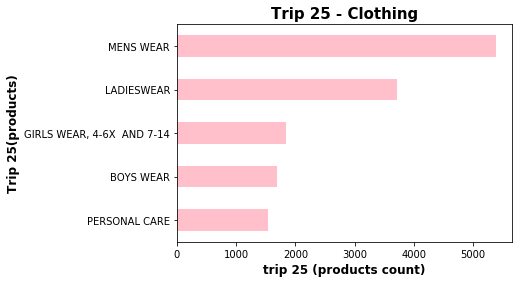

In [43]:
plt.xlabel('trip 25 (products count)',fontdict=font_sub)
plt.ylabel('Trip 25(products)',fontdict=font_sub)
plt.title('Trip 25 - Clothing',fontdict=font_main)
type_25 = cleaned_train_data[cleaned_train_data.TripType == 25]
type_25_items = type_25[["TripType","DepartmentDescription"]]
type_25_items.DepartmentDescription.value_counts().head().plot(kind="barh", rot=0,color="pink").invert_yaxis()

<b> Trip 3: Financial Services

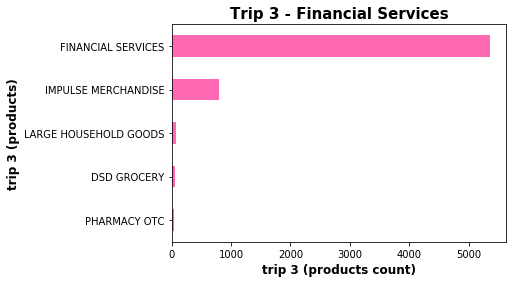

In [44]:
plt.xlabel('trip 3 (products count)',fontdict=font_sub)
plt.ylabel('trip 3 (products)',fontdict=font_sub)
plt.title('Trip 3 - Financial Services',fontdict=font_main)
type_3 = cleaned_train_data[cleaned_train_data.TripType == 3]
type_3_items = type_3[["TripType","DepartmentDescription"]]
type_3_items.DepartmentDescription.value_counts().head().plot(kind="barh", rot=0,color="hotpink").invert_yaxis()

<b> Trip 5 : Pharmacy  

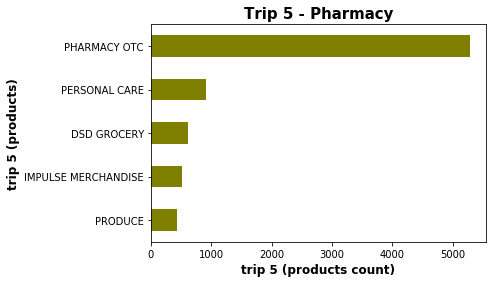

In [45]:
plt.xlabel('trip 5 (products count)',fontdict=font_sub)
plt.ylabel('trip 5 (products)',fontdict=font_sub)
plt.title('Trip 5 - Pharmacy',fontdict=font_main)
type_5 = cleaned_train_data[cleaned_train_data.TripType == 5]
type_5_items = type_5[["TripType","DepartmentDescription"]]
type_5_items.DepartmentDescription.value_counts().head().plot(kind="barh", rot=0,color="olive").invert_yaxis()

<b> Trip 36: Beauty+Personal Care Trip

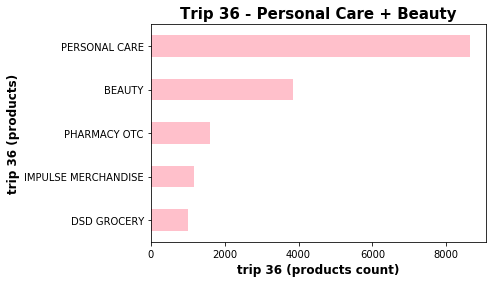

In [46]:
plt.xlabel('trip 36 (products count)',fontdict=font_sub)
plt.ylabel('trip 36 (products)',fontdict=font_sub)
plt.title('Trip 36 - Personal Care + Beauty',fontdict=font_main)
type_36 = cleaned_train_data[cleaned_train_data.TripType == 36]
type_36_items = type_36[["TripType","DepartmentDescription"]]
type_36_items.DepartmentDescription.value_counts().head().plot(kind="barh", rot=0,color="pink").invert_yaxis()

<b> Based on the analysis, some essential points needs to be considered while moving to the stage of feature engineering.
<p><b>  1. It would be a good idea to add a column identifying the number of items purchased on the trip! However, it can be tricky to do within a dataset as each item purchased is represented by a row.
<p> <b> 2. Upc column  might not matter most when compared with department description and number of items purchased column.
<p> <b> 3. Aggregating data and adding new column for return with(0/1), number of items purchased, would help for better model development.
<p> <b> 4. Needs to do give each department description it's own column and provide a number of items purchased or returned.

# Model Analysis
### This is an analysis on Walmart dataset obtained from kaggle repository.

This analysis is as follows. 
1. Feature Engineering.
2. Data pre-processing


### Q2.How can retailers cross-sell products to increase the basket size of the customers?

In [47]:
#importing all essential libraries
import pandas as pd
import numpy as np
import re 
from sklearn.model_selection import train_test_split

In [48]:
#importing the dataset 
data = pd.read_csv("train.csv")

In [49]:
#Origital shape -Before Feature Engineering
data.shape

(647054, 7)

In [50]:
features = ["Weekday", "NumItems", "Return", 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING',  'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']
#Necessary feature building
def transform_my_data(data):
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'NumItems': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HEALTH AND BEAUTY AIDS': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum,'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["TripType", "Weekday", "NumItems", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    return data
data=transform_my_data(data)

In [51]:
#checking rows and columns in the data after Feature  Engineering
data.shape

(95674, 71)

In [52]:
#Transforming Weekday variables into quantitative variables
#Data Pre-processing
def transform(day,no):
    global data
    data=data.replace(day,no)
    return;
transform("Monday", 1)
transform("Tuesday", 2)
transform("Wednesday", 3)
transform("Thursday", 4)
transform("Friday", 5)
transform("Saturday", 6)
transform("Sunday", 7)
#Removing redundant data from department description column
data=data.replace("MENS WEAR","MENSWEAR")

In [53]:
#splitting the data into test and train set 
train, test = train_test_split(data, test_size = 0.2)

In [54]:
#Dropping na values(Data pre-processsing)
test=test.dropna()
train=train.dropna()
train = train

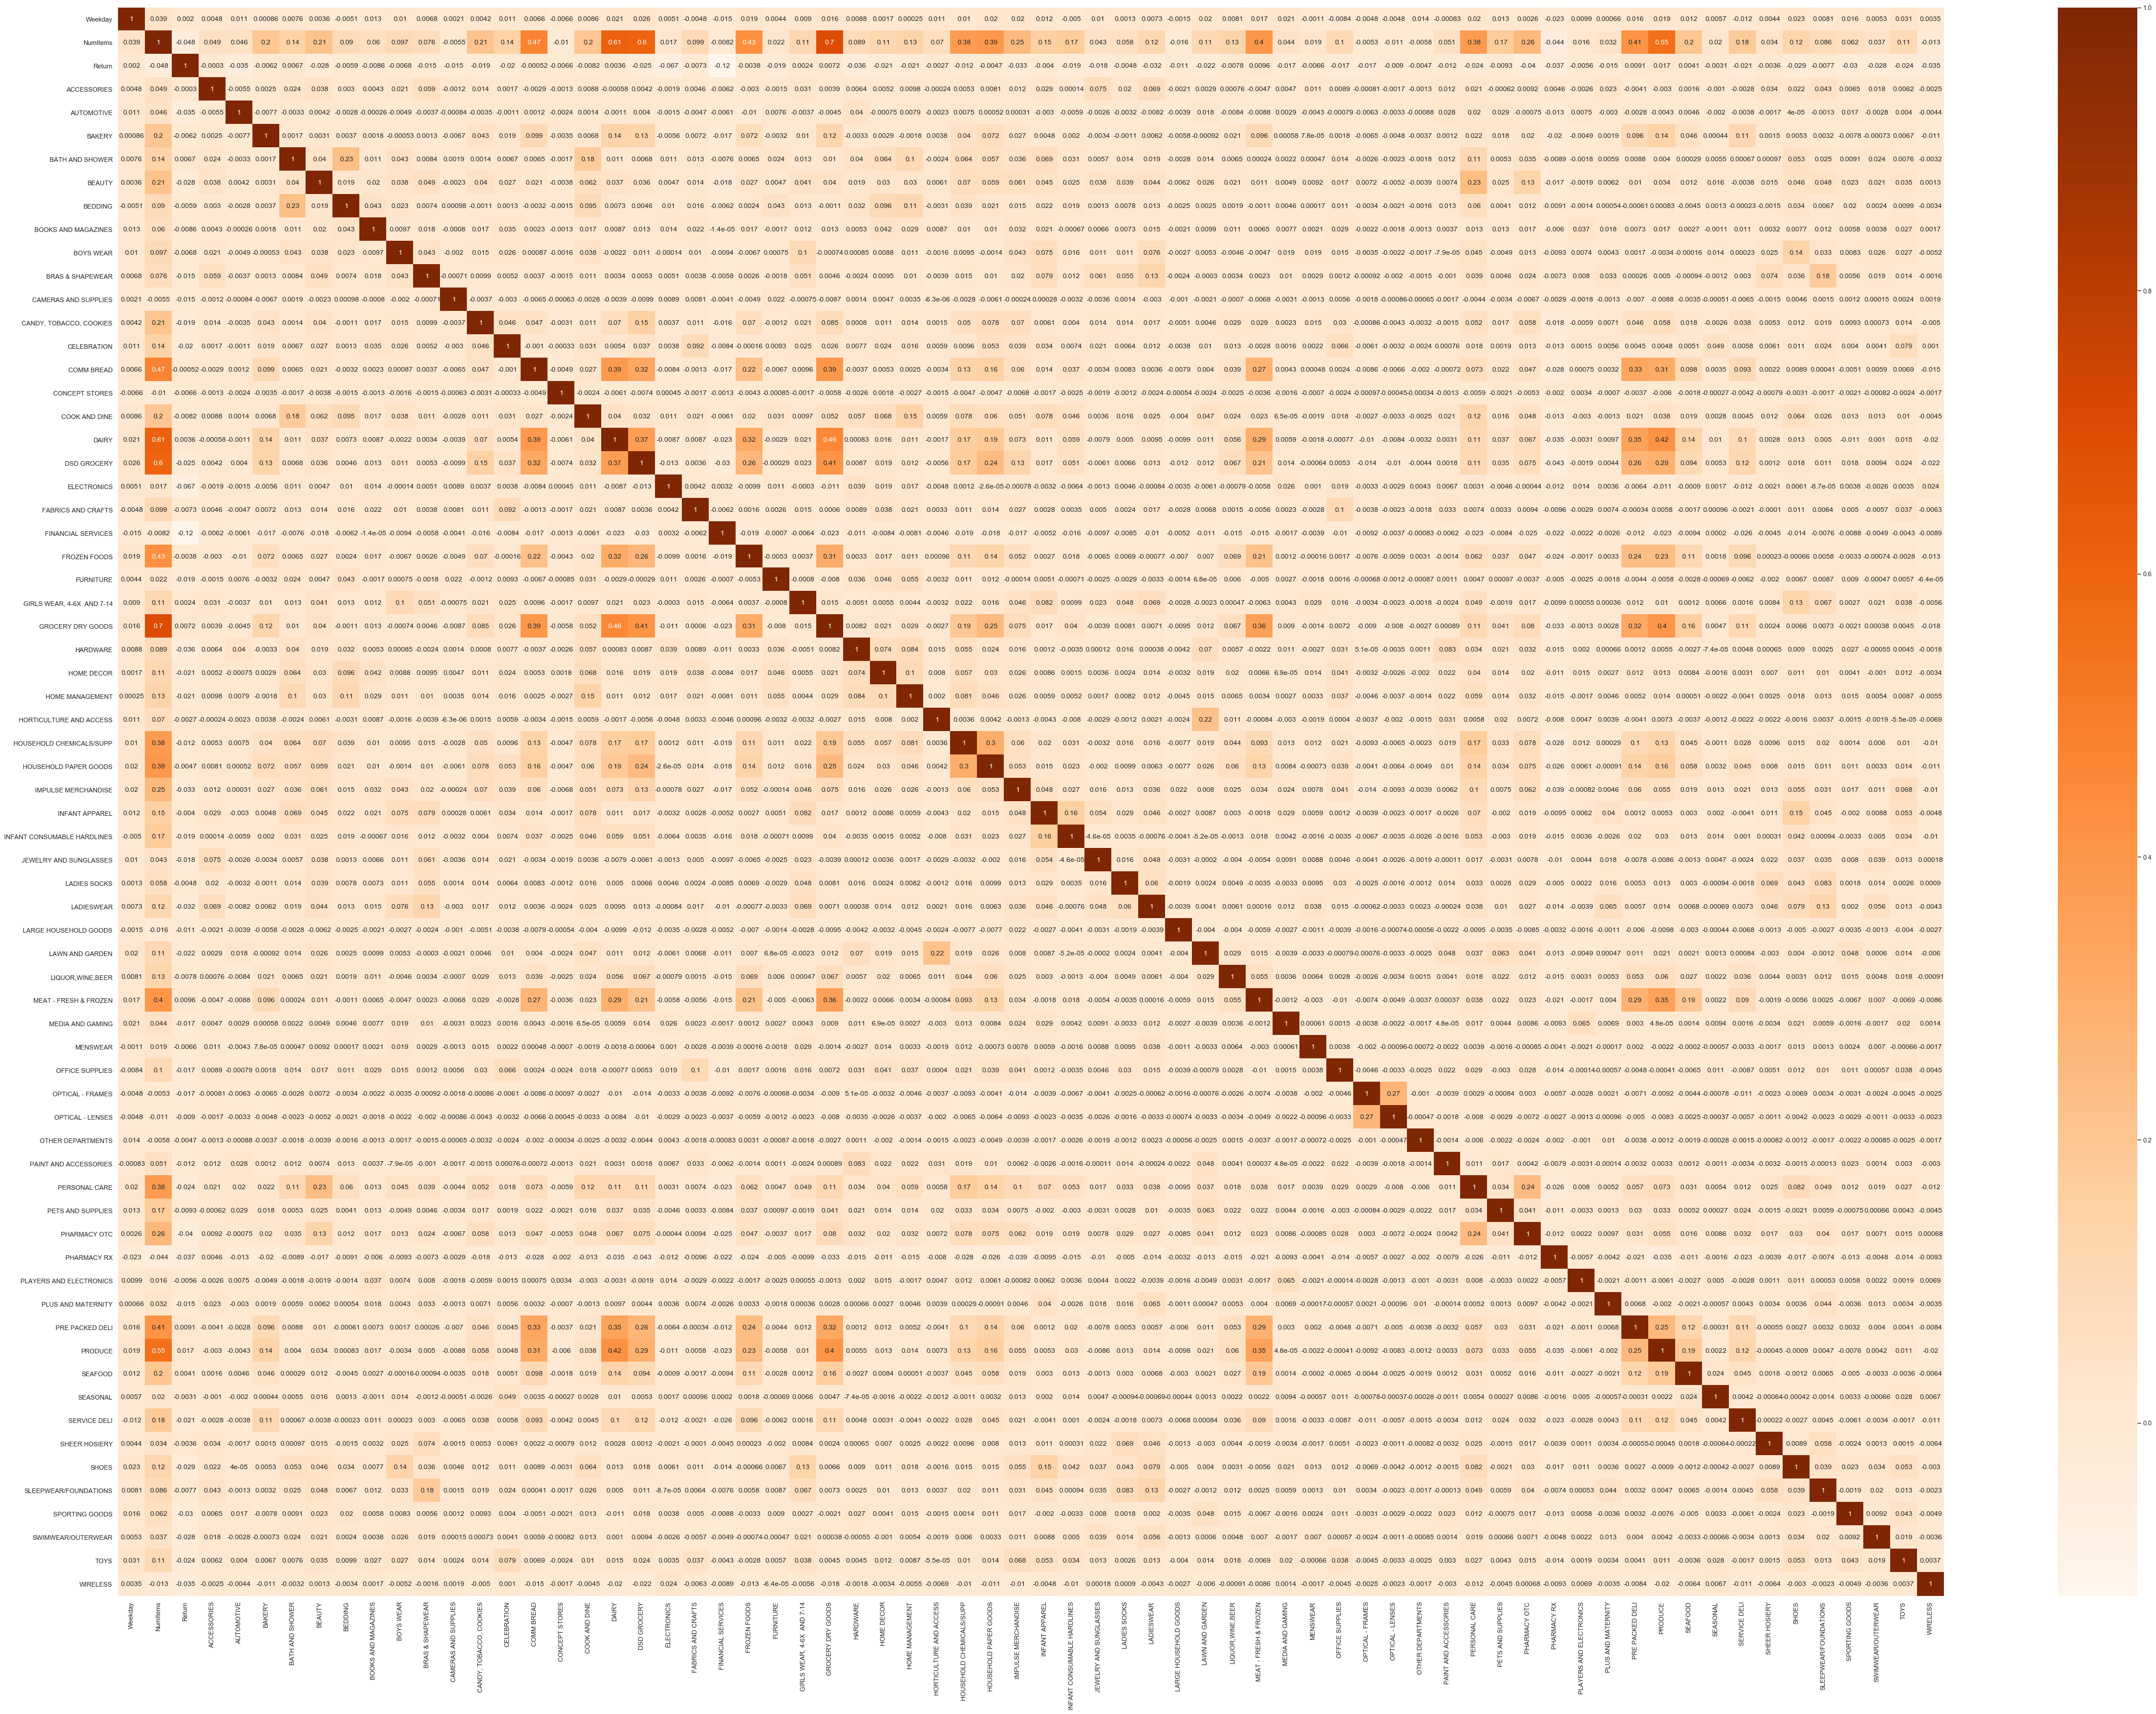

In [55]:
#heatmap
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=10)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
features1 = ["Weekday", "NumItems", "Return", 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING',  'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']
features = [
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS']
features2 = ['BAKERY', 'COMM BREAD', 'DAIRY', 'DSD GROCERY','FROZEN FOODS','GROCERY DRY GOODS','MEAT - FRESH & FROZEN',
            'PRODUCE', 'SEAFOOD', 'SEASONAL']
#Feature Building
X = train[features1]
plt.subplots(figsize=(70,50))
#plt.subplots(figsize=(70,50))
sns.heatmap(X.corr(), annot=True, cmap="Oranges")
plt.show()

### Above graph is the heatmap for all the 60 products with their probability distribution
As it not clearly visible, I have divided these 60 departments sub- products into 10 parts. Out of these 60
departments sub- products, top products were (grocery items).

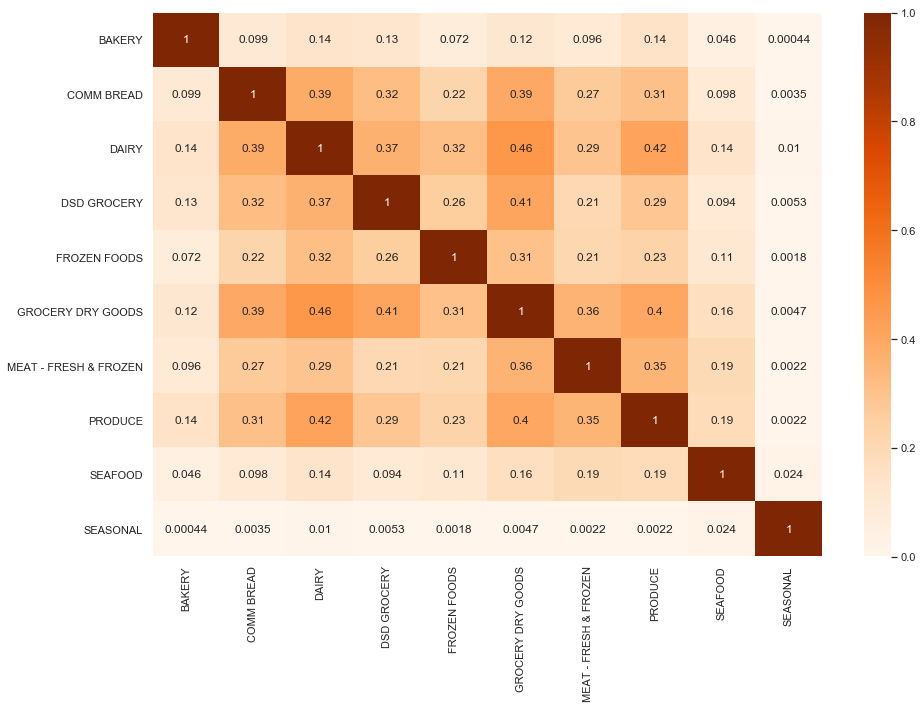

In [56]:
#heatmap for grocery products
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=10)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
features2 = ['BAKERY', 'COMM BREAD', 'DAIRY', 'DSD GROCERY','FROZEN FOODS','GROCERY DRY GOODS','MEAT - FRESH & FROZEN',
            'PRODUCE', 'SEAFOOD', 'SEASONAL']
#Feature Building
X = train[features2]
plt.subplots(figsize=(15,10))
#plt.subplots(figsize=(70,50))
sns.heatmap(X.corr(), annot=True, cmap="Oranges")
plt.show()

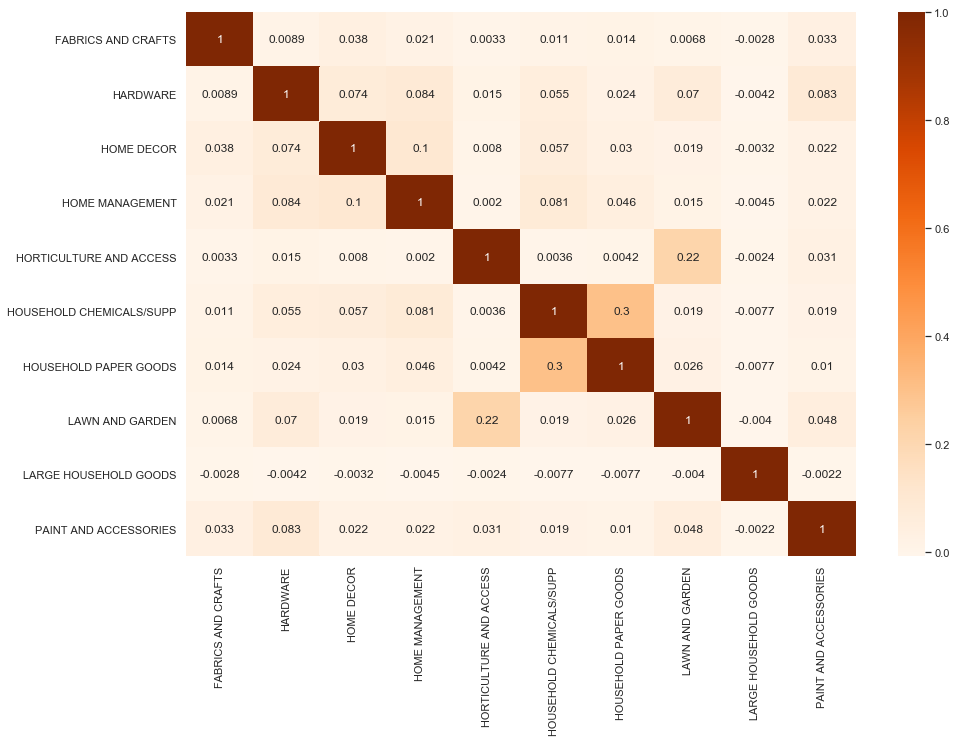

In [57]:
#heatmap for all home decoration products
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=10)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
features1 = [
        'FABRICS AND CRAFTS' , 
        'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
        'LAWN AND GARDEN',  'LARGE HOUSEHOLD GOODS',
        'PAINT AND ACCESSORIES']
#Feature Building
X = train[features1]
plt.subplots(figsize=(15,10))
#plt.subplots(figsize=(70,50))
sns.heatmap(X.corr(), annot=True, cmap="Oranges")
plt.show()

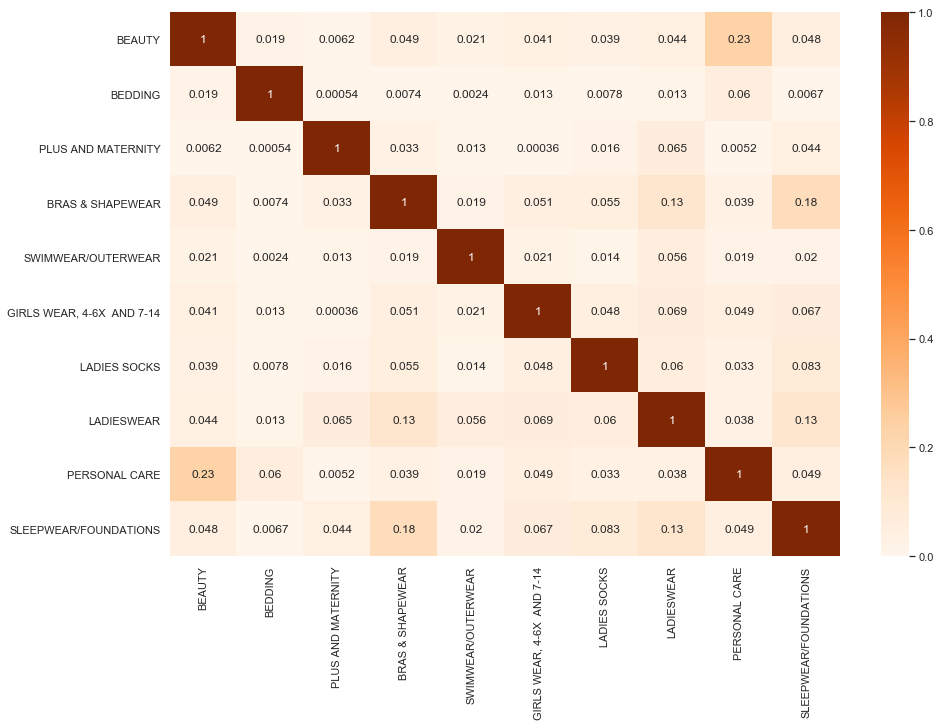

In [58]:
#heatmap for girl's and ladies wear
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=10)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
features1 = ['BEAUTY', 'BEDDING','PLUS AND MATERNITY',
        'BRAS & SHAPEWEAR', 'SWIMWEAR/OUTERWEAR',
        'GIRLS WEAR, 4-6X  AND 7-14',
        'LADIES SOCKS', 'LADIESWEAR',
        'PERSONAL CARE','SLEEPWEAR/FOUNDATIONS']
features = [
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS']
features2 = ['BAKERY', 'COMM BREAD', 'DAIRY', 'DSD GROCERY','FROZEN FOODS','GROCERY DRY GOODS','MEAT - FRESH & FROZEN',
            'PRODUCE', 'SEAFOOD', 'SEASONAL']
#Feature Building
X = train[features1]
plt.subplots(figsize=(15,10))
#plt.subplots(figsize=(70,50))
sns.heatmap(X.corr(), annot=True, cmap="Oranges")
plt.show()

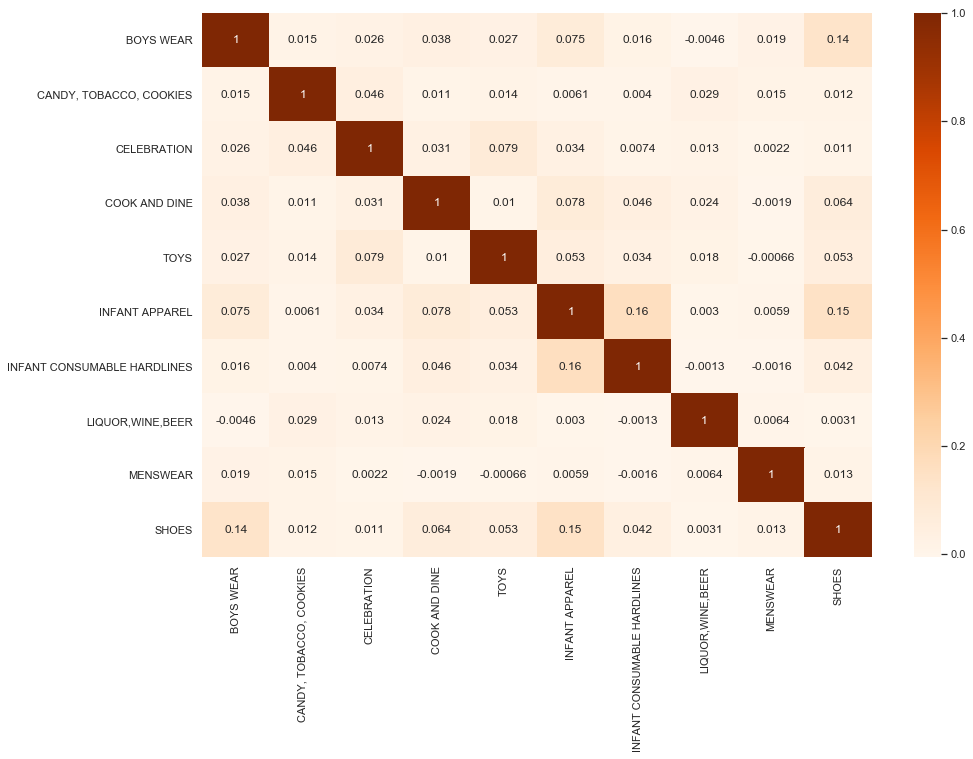

In [59]:
#heatmap for boys and men's wear
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=10)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
features1 = ['BOYS WEAR',  'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
        'COOK AND DINE', 'TOYS',
         'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
        'LIQUOR,WINE,BEER',
         'MENSWEAR',
       
       'SHOES']
#Feature Building
X = train[features1]
plt.subplots(figsize=(15,10))
#plt.subplots(figsize=(70,50))
sns.heatmap(X.corr(), annot=True, cmap="Oranges")
plt.show()

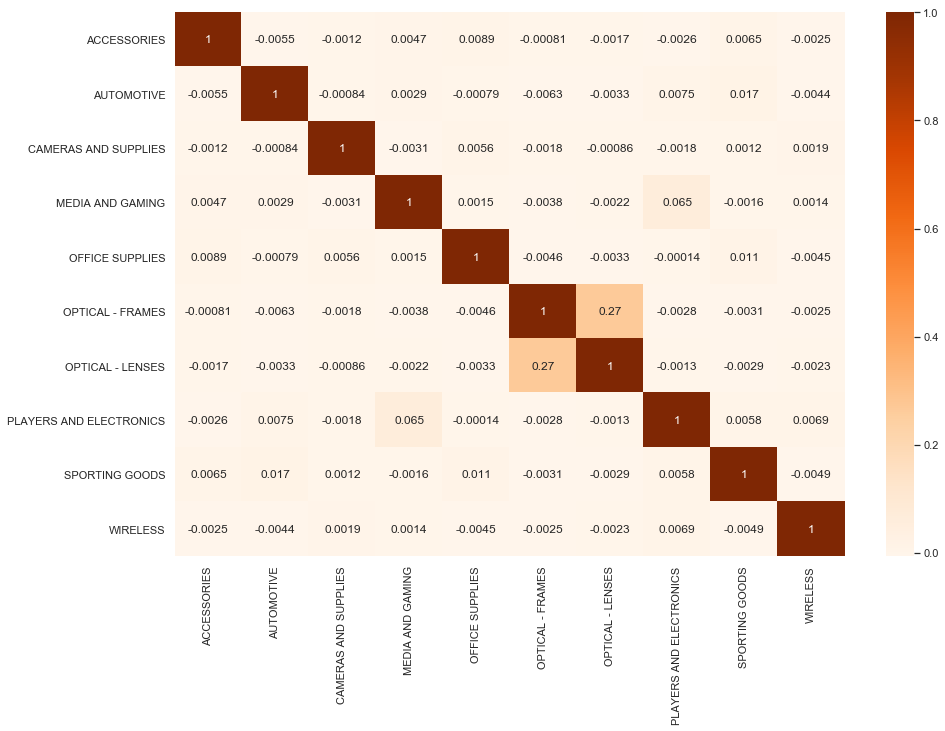

In [60]:
# heatmap for electronics
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=10)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
features1 = ['ACCESSORIES',
       'AUTOMOTIVE', 'CAMERAS AND SUPPLIES', 'MEDIA AND GAMING',  
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'PLAYERS AND ELECTRONICS', 'SPORTING GOODS','WIRELESS']
features = [
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS']
features2 = ['BAKERY', 'COMM BREAD', 'DAIRY', 'DSD GROCERY','FROZEN FOODS','GROCERY DRY GOODS','MEAT - FRESH & FROZEN',
            'PRODUCE', 'SEAFOOD', 'SEASONAL']
#Feature Building
X = train[features1]
plt.subplots(figsize=(15,10))
#plt.subplots(figsize=(70,50))
sns.heatmap(X.corr(), annot=True, cmap="Oranges")
plt.show()

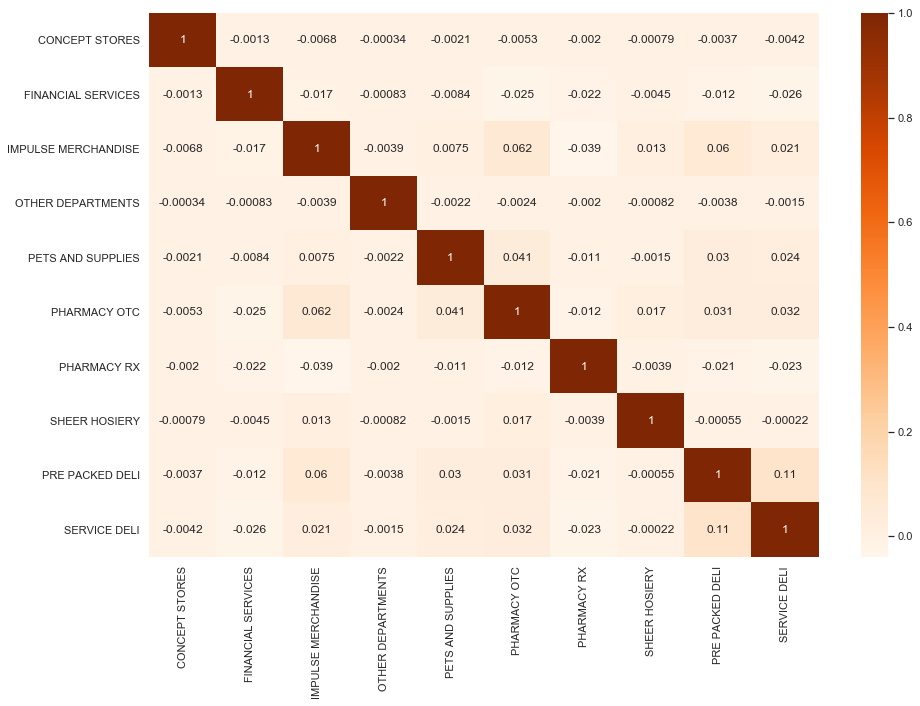

In [61]:
# heatmap for other products
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=10)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
features1 = ['CONCEPT STORES', 'FINANCIAL SERVICES',
       'IMPULSE MERCHANDISE', 
       'OTHER DEPARTMENTS', 
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX','SHEER HOSIERY',
        'PRE PACKED DELI', 'SERVICE DELI']
features = [
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS']
features2 = ['BAKERY', 'COMM BREAD', 'DAIRY', 'DSD GROCERY','FROZEN FOODS','GROCERY DRY GOODS','MEAT - FRESH & FROZEN',
            'PRODUCE', 'SEAFOOD', 'SEASONAL']
#Feature Building
X = train[features1]
plt.subplots(figsize=(15,10))
#plt.subplots(figsize=(70,50))
sns.heatmap(X.corr(), annot=True, cmap="Oranges")
plt.show()